In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import warnings
warnings.filterwarnings("ignore")

In [2]:
import kagglehub, os
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
df = pd.read_csv(os.path.join(path, "Microsoft_Stock.csv"))

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.set_index("Date", inplace=True)

In [4]:
data = df["Close"]

In [5]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(data).reshape(-1, 1)).flatten()


In [6]:
test_obs = 28
train = data_scaled[:-test_obs]
test = data_scaled[-test_obs:]

In [7]:
alpha_values = [0.2, 0.4, 0.6, 0.8]  # few smoothing options for speed
best_rmse = float("inf")
best_alpha = None
best_model = None

print("🔍 Selecting best smoothing level (alpha)...\n")

🔍 Selecting best smoothing level (alpha)...



In [8]:

for alpha in alpha_values:
    try:
        model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
        forecast = model.forecast(len(test))
        rmse = mean_squared_error(test, forecast, squared=False)
        print(f"alpha={alpha:.1f} | RMSE={rmse:.4f}")
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
            best_model = model
    except:
        continue

print(f"\n✅ Best alpha = {best_alpha:.1f} | RMSE = {best_rmse:.4f}")

alpha=0.2 | RMSE=0.0464
alpha=0.4 | RMSE=0.0476
alpha=0.6 | RMSE=0.0449
alpha=0.8 | RMSE=0.0422

✅ Best alpha = 0.8 | RMSE = 0.0422


In [9]:
forecast = best_model.forecast(len(test))

In [10]:
test_inv = scaler.inverse_transform(test.reshape(-1, 1)).flatten()
forecast_inv = scaler.inverse_transform(forecast.reshape(-1, 1)).flatten()

In [11]:
rmse = mean_squared_error(test_inv, forecast_inv, squared=False)
mape = mean_absolute_percentage_error(test_inv, forecast_inv)

In [12]:
print("\n📊 Performance Summary:")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape*100:.2f}%")



📊 Performance Summary:
RMSE: 8.629
MAPE: 3.46%


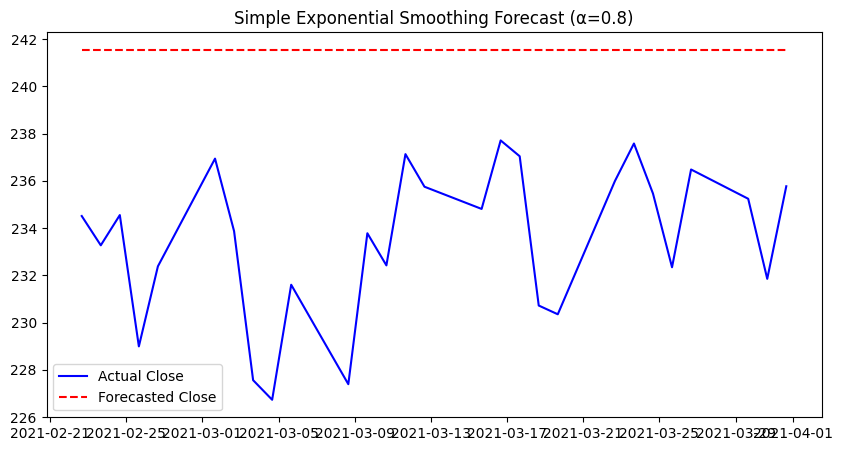

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.index[-test_obs:], test_inv, label="Actual Close", color="blue")
plt.plot(df.index[-test_obs:], forecast_inv, label="Forecasted Close", color="red", linestyle="--")
plt.title(f"Simple Exponential Smoothing Forecast (α={best_alpha:.1f})")
plt.legend()
plt.show()